<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_of_Figure_4A_for_WenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [22]:
Fig4A_file_path = '/content/drive/My Drive/WenLab/Figure 4-source data for Figure 4A.xlsx'
df_4A = pd.read_excel(Fig4A_file_path, sheet_name = None,header = 2)
df_4A_sum = pd.read_excel(Fig4A_file_path, sheet_name = 'Summary',header = 2)
# columns1 = df_4A_sum['worm name']
# print(columns1)
# df_4A.keys()
# df_4A['WEN0602-Pnpr-9  Chrimson'].head()
df_4A_1 = pd.read_excel(Fig4A_file_path,sheet_name = 'WEN0602-Pnpr-9  Chrimson',header=2)
df_4A_2 = pd.read_excel(Fig4A_file_path, sheet_name = 'WEN0619_eat-4 (ky5)',header = 0)
df_4A_3 = pd.read_excel(Fig4A_file_path, sheet_name = 'WEN0619_eat-4 rescue',header = 0)
df_4A_4 = pd.read_excel(Fig4A_file_path, sheet_name = 'WEN0602+Pnpr-9-twk-18',header = 0)
# df_4A_1.head()
df_4A_1.keys()

Index(['worm name', 'turn ', 'reversal duration', 'note'], dtype='object')

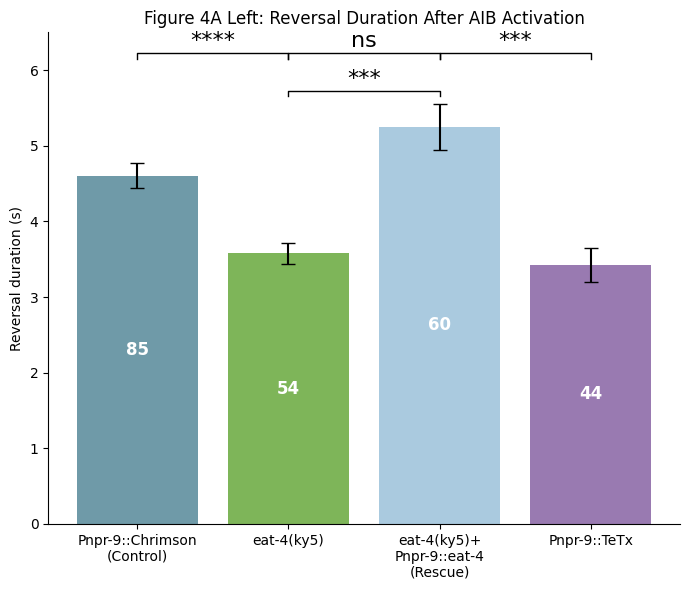

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


data_1 = df_4A_sum[df_4A_sum['worm name'].str.contains("wen0602", na=False)].iloc[0]
data_2 = df_4A_sum[df_4A_sum['worm name'].str.contains('wen0619', na=False)].iloc[0]
data_3 = df_4A_sum[df_4A_sum['worm name'].str.contains('wen0619+quan0128', na = False, regex = False)].iloc[0]
data_4 = df_4A_sum[df_4A_sum['worm name'].str.contains('wen0602+quan0453', na = False, regex = False)].iloc[0]

# 为了绘图，我们创建更简洁易读的标签
labels = [
    'Pnpr-9::Chrimson\n(Control)',
    'eat-4(ky5)',
    'eat-4(ky5)+\nPnpr-9::eat-4\n(Rescue)',
    'Pnpr-9::TeTx'
]

# 从 DataFrame 中提取绘图所需数据
means = df_4A_sum['average reversal length']
sems = df_4A_sum['sem']
sample_sizes = df_4A_sum['n']
x_pos = np.arange(len(labels))

#2. 绘图g,
fig, ax = plt.subplots(figsize=(7, 6))

# 创建条形图
# 使用与原图相似的颜色 (对照组和拯救组为深/浅蓝色，突变体为绿色和紫色)
colors = ['#5F8F9F', '#70AD47', '#A1C5DC', '#8E6CA9']
bars = ax.bar(x_pos, means,
              yerr=sems,          # 添加误差线 (SEM)
              align='center',
              alpha=0.9,
              color=colors,
              ecolor='black',       # 误差线颜色
              capsize=5)          # 误差线顶端横线宽度

# 在每个条形图内部添加样本量 (n) 的数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, # x 轴居中
            height / 2,                      # y 轴居中
            f'{sample_sizes[i]}',             # 文本内容为 n 值
            ha='center',
            va='center',
            color='white',
            fontsize=12,
            fontweight='bold')

def add_significance_bracket(x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    line_y = y_start + 0.07 # 标记线的高度，比y_start稍高
    text_y = line_y + 0.03  # 星号文本的高度
    # 绘制水平线
    plt.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # 添加星号文本
    plt.text((x1 + x2) * 0.5, text_y, text, ha='center', va='bottom', fontsize=16)
##绘制四组数据之间的的显著性分析线
  # a) 比较 'Pnpr-9::Chrimson\n(Control)', 'eat-4(ky5)'
p_val_1 = data_2.get('p_value u-test', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_1) and p_val_1 < 0.0001:
    # 通过数据可知最高的是第三组即x=2的mean值和sems值
    Rd_max = means[2]
    y_max = Rd_max+sems[2]
    add_significance_bracket(x_pos[0], x_pos[1], y_max + 0.6, '****')
  # b) 比较 eat-4(ky5)(x=1) vs eat-4(ky5)+\nPnpr-9::eat-4\n(Rescue)(x=2)
p_val_2 = data_3.get('p_value u-test', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_2) and p_val_2 < 0.0001:
    # 通过数据可知最高的是第三组即x=2的mean值和sems值
    Rd_max = means[2]
    y_max = Rd_max+sems[2]
    add_significance_bracket(x_pos[0], x_pos[1], y_max + 0.6, '****')
else:
  add_significance_bracket(x_pos[1], x_pos[2], y_max + 0.6, 'ns')
## c) 比较 eat-4(ky5)+\nPnpr-9::eat-4\n(Rescue)(x=2) vs 'eat-4(ky5)+\nPnpr-9::eat-4\n(Rescue)'(x=3)
p_val_3 = data_4.get('p_value u-test', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_3) and p_val_3 < 0.001:
    # 通过数据可知最高的是第三组即x=2的mean值和sems值
    Rd_max = max(means[2], means[3])
    y_max = max(Rd_max+sems[2], Rd_max+sems[3])
    add_significance_bracket(x_pos[2], x_pos[3], y_max + 0.6, '***')
## d) 比较 eat-4(ky5)(x=1) vs eat-4(ky5)+\nPnpr-9::eat-4\n(Rescue)(x=2)
p_val_3_multi = data_3.get('multi comparision', 1.0) # 使用 .get 防止 p-value 列不存在时报错
if pd.notna(p_val_3) and p_val_3 < 0.001:
    # 需要比较x=1和x=2之间那一组的means和sem最高
    Rd_max = max(means[1], means[2])
    y_max = max(Rd_max+sems[1], Rd_max+sems[2])
    add_significance_bracket(x_pos[1], x_pos[2], y_max + 0.1, '***')



#3. 格式化图表
ax.set_ylabel('Reversal duration (s)')
ax.set_title('Figure 4A Left: Reversal Duration After AIB Activation')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45) # 标签水平显示
ax.set_ylim(0, 6.5) # 设置 Y 轴范围以匹配原图

# 移除顶部和右侧的坐标轴线，使图像更简洁
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 确保布局紧凑
plt.tight_layout()

# 显示图像
plt.show()


plt.savefig('figure_4a_left_reproduction.png', dpi=300)

开始处理: Control 组
正在计算转变率...
Control 组处理完毕。

开始处理: eat-4(ky5) 组
正在计算转变率...
eat-4(ky5) 组处理完毕。

开始处理: Pnpr-9::TeTx 组
使用 TeTx 专属的列名进行清理和转换...
正在计算转变率...
Pnpr-9::TeTx 组处理完毕。

开始绘制最终图表


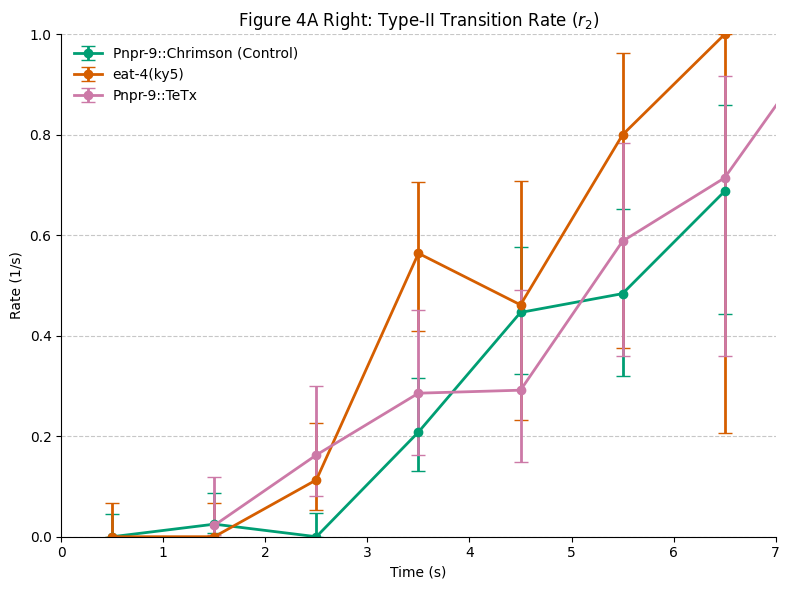

绘图完成！


In [16]:
#:准备工作

# 导入我们需要的所有工具
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

# 我们把所有可能用到的列名都先定义好
#来自 Control 和 eat-4 组
TIME_COL_DEFAULT = 'reversal duration'
BEHAVIOR_COL_DEFAULT = 'turn ' # 注意有空格

#来自 TeTx 组 (根据你的 .keys() 结果)
TIME_COL_TETX = 'duration time (s)'


# 其他常量不变
STATE_WE_CARE_ABOUT = 1
TIME_BINS = np.arange(0, 8, 1)

# 创建一个空的图表
fig, ax = plt.subplots(figsize=(8, 6))


#步骤 1: 处理第一组数据 (Control)

print("开始处理: Control 组")


# 清理和类型转换
df_4A_1[TIME_COL_DEFAULT] = pd.to_numeric(df_4A_1[TIME_COL_DEFAULT], errors='coerce')
df_4A_1[BEHAVIOR_COL_DEFAULT] = pd.to_numeric(df_4A_1[BEHAVIOR_COL_DEFAULT], errors='coerce')
df_4A_1 = df_4A_1.dropna(subset=[TIME_COL_DEFAULT, BEHAVIOR_COL_DEFAULT])

x_coords_control, rates_control, ci_low_control, ci_high_control = [], [], [], []
print("正在计算转变率...")
for i in range(len(TIME_BINS) - 1):
    bin_start, bin_end = TIME_BINS[i], TIME_BINS[i+1]
    survivors = df_4A_1[df_4A_1[TIME_COL_DEFAULT] >= bin_start]
    S_total = len(survivors)
    events_in_bin = survivors[(survivors[TIME_COL_DEFAULT] < bin_end) & (survivors[BEHAVIOR_COL_DEFAULT] == STATE_WE_CARE_ABOUT)]
    n_events = len(events_in_bin)
    x_coords_control.append((bin_start + bin_end) / 2)
    if S_total > 0:
        rate, (low, high) = n_events / S_total, proportion_confint(n_events, S_total, method='wilson')
        rates_control.append(rate); ci_low_control.append(low); ci_high_control.append(high)
    else:
        rates_control.append(np.nan); ci_low_control.append(np.nan); ci_high_control.append(np.nan)
print("Control 组处理完毕。")


#步骤 2: 处理第二组数据 (eat-4)
print("\n开始处理: eat-4(ky5) 组")


# 清理和类型转换
df_4A_2[TIME_COL_DEFAULT] = pd.to_numeric(df_4A_2[TIME_COL_DEFAULT], errors='coerce')
df_4A_2[BEHAVIOR_COL_DEFAULT] = pd.to_numeric(df_4A_2[BEHAVIOR_COL_DEFAULT], errors='coerce')
df_4A_2 = df_4A_2.dropna(subset=[TIME_COL_DEFAULT, BEHAVIOR_COL_DEFAULT])

# ... (计算部分和之前一样) ...
x_coords_eat4, rates_eat4, ci_low_eat4, ci_high_eat4 = [], [], [], []
print("正在计算转变率...")
for i in range(len(TIME_BINS) - 1):
    bin_start, bin_end = TIME_BINS[i], TIME_BINS[i+1]
    survivors = df_4A_2[df_4A_2[TIME_COL_DEFAULT] >= bin_start]
    S_total = len(survivors)
    events_in_bin = survivors[(survivors[TIME_COL_DEFAULT] < bin_end) & (survivors[BEHAVIOR_COL_DEFAULT] == STATE_WE_CARE_ABOUT)]
    n_events = len(events_in_bin)
    x_coords_eat4.append((bin_start + bin_end) / 2)
    if S_total > 0:
        rate, (low, high) = n_events / S_total, proportion_confint(n_events, S_total, method='wilson')
        rates_eat4.append(rate); ci_low_eat4.append(low); ci_high_eat4.append(high)
    else:
        rates_eat4.append(np.nan); ci_low_eat4.append(np.nan); ci_high_eat4.append(np.nan)
print("eat-4(ky5) 组处理完毕。")


#步骤 3: 处理第三组数据 (TeTx)
print("\n开始处理: Pnpr-9::TeTx 组")

# 在这里，我们使用 TeTx 组专属的、正确的列名
print("使用 TeTx 专属的列名进行清理和转换...")
df_4A_4[TIME_COL_TETX] = pd.to_numeric(df_4A_4[TIME_COL_TETX], errors='coerce')
df_4A_4['turn'] = pd.to_numeric(df_4A_4['turn'], errors='coerce')
df_4A_4 = df_4A_4.dropna(subset=[TIME_COL_TETX, 'turn'])

x_coords_tetx, rates_tetx, ci_low_tetx, ci_high_tetx = [], [], [], []
print("正在计算转变率...")
for i in range(len(TIME_BINS) - 1):
    bin_start, bin_end = TIME_BINS[i], TIME_BINS[i+1]

    # 在计算时，也必须使用正确的列名
    survivors = df_4A_4[df_4A_4[TIME_COL_TETX] >= bin_start]
    S_total = len(survivors)
    events_in_bin = survivors[
        (survivors[TIME_COL_TETX] < bin_end) &
        (survivors['turn'] == STATE_WE_CARE_ABOUT)
    ]

    n_events = len(events_in_bin)
    x_coords_tetx.append((bin_start + bin_end) / 2)
    if S_total > 0:
        rate, (low, high) = n_events / S_total, proportion_confint(n_events, S_total, method='wilson')
        rates_tetx.append(rate); ci_low_tetx.append(low); ci_high_tetx.append(high)
    else:
        rates_tetx.append(np.nan); ci_low_tetx.append(np.nan); ci_high_tetx.append(np.nan)

print("Pnpr-9::TeTx 组处理完毕。")


#步骤 4: 最终绘图

print("\n开始绘制最终图表")
y_error_control = [np.array(rates_control) - np.array(ci_low_control), np.array(ci_high_control) - np.array(rates_control)]
ax.errorbar(x_coords_control, rates_control, yerr=y_error_control, fmt='-o', capsize=5, label='Pnpr-9::Chrimson (Control)', color='#009E73', lw=2)

y_error_eat4 = [np.array(rates_eat4) - np.array(ci_low_eat4), np.array(ci_high_eat4) - np.array(rates_eat4)]
ax.errorbar(x_coords_eat4, rates_eat4, yerr=y_error_eat4, fmt='-o', capsize=5, label='eat-4(ky5)', color='#D55E00', lw=2)

y_error_tetx = [np.array(rates_tetx) - np.array(ci_low_tetx), np.array(ci_high_tetx) - np.array(rates_tetx)]
ax.errorbar(x_coords_tetx+np.ones_like(len(x_coords_tetx)/100), rates_tetx, yerr=y_error_tetx, fmt='-o', capsize=5, label='Pnpr-9::TeTx', color='#CC79A7', lw=2)

# 美化图表
ax.set_title('Figure 4A Right: Type-II Transition Rate ($r_2$)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Rate (1/s)')
ax.set_xlim(0, 7)
ax.set_ylim(0, 1.0)
ax.set_xticks(np.arange(0, 8, 1))
ax.legend(loc='upper left', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("绘图完成！")

###备注：这里的代码用来计算置信区间的算法是python中常见的Wilson score方法，而，matlab章使用的是binofit 函数默认使用的Clopper-Pearson方法。我们的置信棒展现了相同的趋势，但是一些细微值上有差距。

--- 调试信息：即将进入循环的变量列名 ---
df_4A_1 (Control) 实际列名: ['worm name', 'turn ', 'reversal duration', 'note']
df_4A_2 (eat-4)   实际列名: ['worm', 'turn ', 'reversal duration', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
df_4A_4 (TeTx)    实际列名: ['worm name', 'turn', 'duration time (s)', 'date']
-----------------------------------------
开始计算所有组的实验数据点
处理: Control...
reversal duration turn 
处理: eat-4...
reversal duration turn 
处理: TeTx...
duration time (s) turn
所有实验数据点计算完毕。

开始绘制图表并进行拟合
成功拟合: Control (参数: [-0.60357384 -0.61535078 -9.03211225  1.36104251])
成功拟合: eat-4 (参数: [0.61129527 0.3544674  3.35255334 2.09894351])
成功拟合: TeTx (参数: [0.28388555 0.04093328 1.77493243 3.02316294])
正在计算 eat-4 vs Control 统计...
正在计算 TeTx vs Control 统计...


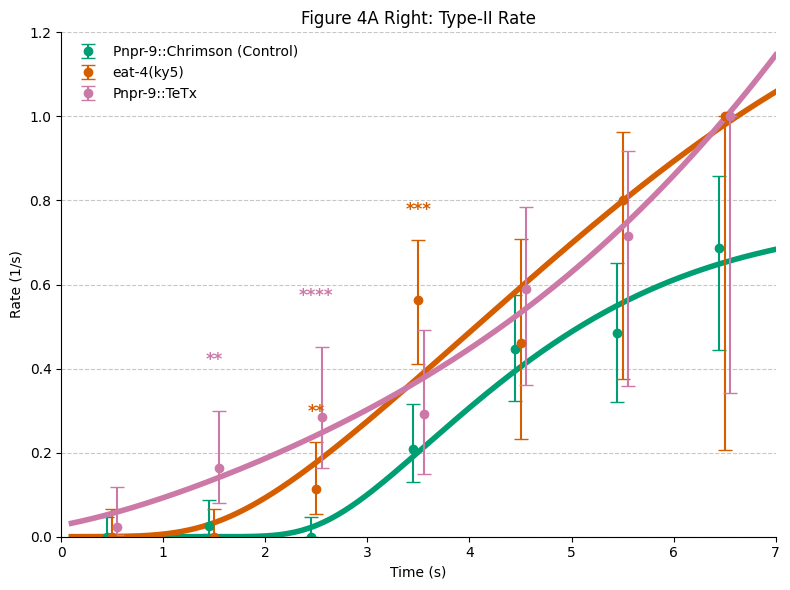

绘图完成！


In [25]:
###加上拟合曲线版的图像
# 步骤 0: 准备工作

# 导入我们需要的所有工具，这次是 erfi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.special import erfi #! 关键修改：导入 erfi (替换 erfinv)

def r2_fit_function_v2(t, k1, k2, k3, k4):
    """
    r2(t) = k1 / erfi( k2 + k3 * exp(-t / k4) )
    """

    # 计算 erfi 括号内的参数
    argument = k2 + k3 * np.exp(-t / k4)

    # erfi(0) 等于 0，这会导致除零错误
    # 我们加上一个极小值 (epsilon) 来防止分母为零，这在数值计算中很常见
    denominator = erfi(argument) + 1e-9

    return k1 / denominator



# 步骤 1: 加载并处理所有数据
# (这部分代码它负责计算数据点)
# 调试代码：在循环开始前，强行打印所有变量的真实列名
print("--- 调试信息：即将进入循环的变量列名 ---")
print(f"df_4A_1 (Control) 实际列名: {df_4A_1.columns.to_list()}")
print(f"df_4A_2 (eat-4)   实际列名: {df_4A_2.columns.to_list()}")
print(f"df_4A_4 (TeTx)    实际列名: {df_4A_4.columns.to_list()}")
print("-----------------------------------------")

# 定义所有可能用到的列名
TIME_COLS = {'default': 'reversal duration', 'tetx': 'duration time (s)'}
BEHAVIOR_COLS = {'default': 'turn ', 'tetx': 'turn'}

# 定义文件
DATA_FILES = {
    'Control': df_4A_1,
    'eat-4': df_4A_2,
    'TeTx': df_4A_4
}

# 时间分箱
TIME_BINS = np.arange(0, 8, 1)
STATE_WE_CARE_ABOUT = 1

# 用来存储所有组的计算结果
experimental_data = {}

print("开始计算所有组的实验数据点")
for group_name, df in DATA_FILES.items():
    print(f"处理: {group_name}...")

    # 根据组别选择正确的列名
    time_col = TIME_COLS['tetx'] if group_name == 'TeTx' else TIME_COLS['default']
    behavior_col = BEHAVIOR_COLS['tetx'] if group_name == 'TeTx' else BEHAVIOR_COLS['default']

    # 清理和类型转换
    df[time_col] = pd.to_numeric(df[time_col], errors='coerce')
    df[behavior_col] = pd.to_numeric(df[behavior_col], errors='coerce')
    df = df.dropna(subset=[time_col, behavior_col])
    print(time_col,behavior_col)

    # 准备空列表
    x_coords, rates, ci_low, ci_high  = [], [], [], []
    S_total, n_events = [], []
    # 计算转变率
    for i in range(len(TIME_BINS) - 1):
        bin_start, bin_end = TIME_BINS[i], TIME_BINS[i+1]
        survivors = df[df[time_col] >= bin_start]
        current_S_total = len(survivors)
        events_in_bin = survivors[(survivors[time_col] < bin_end) & (survivors[behavior_col] == STATE_WE_CARE_ABOUT)]
        current_n_events = len(events_in_bin)
        S_total.append(current_S_total)
        n_events.append(current_n_events)

        x_coords.append((bin_start + bin_end) / 2)

        if current_S_total > 0:
            rate, (low, high) = current_n_events / current_S_total, proportion_confint(current_n_events, current_S_total, method='wilson')
            rates.append(rate); ci_low.append(low); ci_high.append(high)
        else:
            rates.append(np.nan); ci_low.append(np.nan); ci_high.append(np.nan)

    # 将结果存入字典
    experimental_data[group_name] = {
        'x': np.array(x_coords),
        'y': np.array(rates),
        'ci_low': np.array(ci_low),
        'ci_high': np.array(ci_high),
        'S_total': np.array(S_total),
        'n_events': np.array(n_events)
    }

print("所有实验数据点计算完毕。")

##定义显著性表达函数
def p_to_asterisk(p_value):
    """根据图注中的标准，将 p 值转换为显著性星号。"""
    if p_value < 0.0001:
        return '****'
    if p_value < 0.001:
        return '***'
    if p_value < 0.01:
        return '**'
    if p_value < 0.05:
        return '*'
    return 'ns' # 'ns' = 不显著

# 步骤 2: 绘图与拟合

print("\n开始绘制图表并进行拟合")

fig, ax = plt.subplots(figsize=(8, 6))

# 图例标签和颜色
LABELS = {
    'Control': 'Pnpr-9::Chrimson (Control)',
    'eat-4': 'eat-4(ky5)',
    'TeTx': 'Pnpr-9::TeTx'
}
COLORS = {
    'Control': '#009E73', # 绿色
    'eat-4': '#D55E00',   # 红色
    'TeTx': '#CC79A7'     # 紫色
}
offsets = {
    'Control': -0.05,  # Control 组向左移
    'eat-4':    0.0,   # eat-4 组保持在中间
    'TeTx':     0.05    # TeTx 组向右移
    }

# 为拟合曲线创建一个平滑的时间轴
t_smooth = np.linspace(0.1, 7, 200)

for group_name, data in experimental_data.items():
  ##为每组的x值得到偏置
    offset = offsets.get(group_name, 0.0)


    # A: 绘制实验数据点和误差线
    y_error = [data['y'] - data['ci_low'], data['ci_high'] - data['y']]
    ax.errorbar(data['x']+offset, data['y'], yerr=y_error,
                fmt='o', # 'o' 表示只画点，不画线
                capsize=5,
                color=COLORS[group_name],
                label=LABELS[group_name])

    # B: 准备拟合数据 (curve_fit 不能处理 NaN)
    valid_indices = ~np.isnan(data['y'])
    x_fit = data['x'][valid_indices]
    y_fit = data['y'][valid_indices]

    # C: 进行拟合
    try:
        # 使用提供的 MATLAB 代码中的 k0 初始猜测值
        initial_guesses = [0.0007, 0.0020, 0.1264, 0.8393]

        # 使用我们新定义的拟合函数
        params, _ = curve_fit(r2_fit_function_v2, x_fit, y_fit, p0=initial_guesses, maxfev=5000)

        # D: 用拟合得到的参数，生成平滑曲线
        y_smooth = r2_fit_function_v2(t_smooth, *params)

        # E: 绘制平滑的拟合曲线
        ax.plot(t_smooth, y_smooth, color=COLORS[group_name], lw=4)
        print(f"成功拟合: {group_name} (参数: {params})")

    except RuntimeError:
        print(f"*** 警告: 无法为 {group_name} 找到合适的拟合参数。")




# 计算并绘制显著性

print("正在计算 eat-4 vs Control 统计...")

# 确保 'eat-4' 组的数据存在
if 'eat-4' in experimental_data:
    # 我们遍历每一个时间点 (0.5s, 1.5s, 2.5s, ...)
    # 使用 experimental_data['Control'] 中的数据作为循环基准
    for i in range(len(experimental_data['Control']['x'])):

        # Control 组: 从 experimental_data 中提取数据
        n_events_ctrl = experimental_data['Control']['n_events'][i]
        s_total_ctrl = experimental_data['Control']['S_total'][i]
        n_not_turned_ctrl = s_total_ctrl - n_events_ctrl

        # eat-4 组: 从 experimental_data 中提取数据
        n_events_exp = experimental_data['eat-4']['n_events'][i]
        s_total_exp = experimental_data['eat-4']['S_total'][i]
        n_not_turned_exp = s_total_exp - n_events_exp

        # 只要两组都有数据
        if s_total_ctrl > 0 and s_total_exp > 0:

            # 2x2 列联表
            table = [ [n_events_exp,  n_not_turned_exp],  # 实验组 (eat-4)
                      [n_events_ctrl, n_not_turned_ctrl] ] # 对照组 (Control)

            # 运行 Fisher 精确检验
            p_value = fisher_exact(table)[1]
            asterisk = p_to_asterisk(p_value)

            # 如果显著 (p < 0.05)，我们就把它画出来
            if asterisk != 'ns':
                # Y 轴位置：取两组中较高的那个误差棒，再往上加一点
                y_pos = max(experimental_data['Control']['ci_high'][i], experimental_data['eat-4']['ci_high'][i]) + 0.05
                # X 轴位置：就画在当前的时间点上
                x_pos = experimental_data['Control']['x'][i]

                # 用 ax.text() 函数在图上写字
                # 使用 COLORS 字典中定义的颜色
                ax.text(x_pos, y_pos, asterisk, ha='center', va='bottom',
                        color=COLORS['eat-4'], fontweight='bold', fontsize=12)

else:
    print("警告: 未在 experimental_data 中找到 'eat-4' 组的数据，跳过统计。")


# 4E: 计算并绘制 TeTx vs Control 的显著性
print("正在计算 TeTx vs Control 统计...")

# 确保 'TeTx' 组的数据存在
if 'TeTx' in experimental_data:
    # (这部分逻辑与上面完全相同，只是换了数据)
    for i in range(len(experimental_data['Control']['x'])):
        # Control 组
        n_events_ctrl = experimental_data['Control']['n_events'][i]
        s_total_ctrl = experimental_data['Control']['S_total'][i]
        n_not_turned_ctrl = s_total_ctrl - n_events_ctrl

        # TeTx 组
        n_events_exp = experimental_data['TeTx']['n_events'][i]
        s_total_exp = experimental_data['TeTx']['S_total'][i]
        n_not_turned_exp = s_total_exp - n_events_exp

        if s_total_ctrl > 0 and s_total_exp > 0:
            table = [ [n_events_exp,  n_not_turned_exp],  # 实验组 (TeTx)
                      [n_events_ctrl, n_not_turned_ctrl] ] # 对照组 (Control)

            p_value = fisher_exact(table)[1]
            asterisk = p_to_asterisk(p_value)

            if asterisk != 'ns':
                # Y 轴位置：取两组中较高的那个误差棒，再往上加一点
                # 我们给 TeTx 的星号加高一点 (0.1)，防止和 eat-4 的星号重叠
                y_pos = max(experimental_data['Control']['ci_high'][i], experimental_data['TeTx']['ci_high'][i]) + 0.1
                x_pos = experimental_data['Control']['x'][i]

                # 使用 COLORS 字典中定义的颜色
                ax.text(x_pos, y_pos, asterisk, ha='center', va='bottom',
                        color=COLORS['TeTx'], fontweight='bold', fontsize=12)
else:
    print("警告: 未在 experimental_data 中找到 'TeTx' 组的数据，跳过统计。")
# 步骤 3: 美化图表
ax.set_title('Figure 4A Right: Type-II Rate')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Rate (1/s)')
ax.set_xlim(0, 7)
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(0, 8, 1))
ax.legend(loc='upper left', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
print("绘图完成！")

###好像还是因为计算平台的差异，python上的计算结果与matlab上的会有一点差距